Engy-5310: Computational Continuum Transport Phenomena Fall 2021 UMass Lowell; Prof. V. F. de Almeida **05Oct21**

# Homework 03 (05Oct21)

$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

### Name: `your name`

### Rubric for each assignment: 

|       Context               |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file in the Blackboard submission portal as: 
   </span> 
   
   **lastname-firstname-labwork-xx.ipynb**

---
## Table of Assignments<a id="toa"></a>
* [Assignment 1 (30 pts)](#a1) Function approximation with Wavelets basis functions.
 - [1.1)](#a11)(5 pts) Generate the target function.
 - [1.2)](#a12)(10 pts) Compute parameters for a given error level.
 - [1.3)](#a13)(15 pts) Using the same basis functions, approximate the target function continuously ($m\rightarrow\infty$) and constrain the end points.
* [Assignment 2 (65 pts)](#a2) Rayleigh-Ritz solution of a heat conduction model problem.
 - [2.1)](#a21)(35 pts) Constrained Fourier basis function approximation.
 - [2.2)](#a22)(30 pts) Demonstrate why the approximation results for the end point derivatives can't be improved.
* [Assignment 3 (5 pts)](#a3) .
---

## <span style="color:blue">[Assignment 1 (30 pts)](#toa)</span><a id="a1"></a>

### <span style="color:blue">[1.1)](#toa)(5 pts) Generate the following piecewise linear function on these shape points:</span>
<br>
<span style="color:blue">
  $\{(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)\}$.
</span><a id="a11"></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.linalg import solve, norm
from scipy.integrate import quad_vec
from scipy.integrate import quad
from numpy.linalg import matrix_rank
import math
import scipy

In [ ]:
shape_pts=np.array([(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)])

x = shape_pts[:,0]
y = shape_pts[:,1]

x_min=shape_pts[:,0][0]
x_max=shape_pts[:,0][-1]

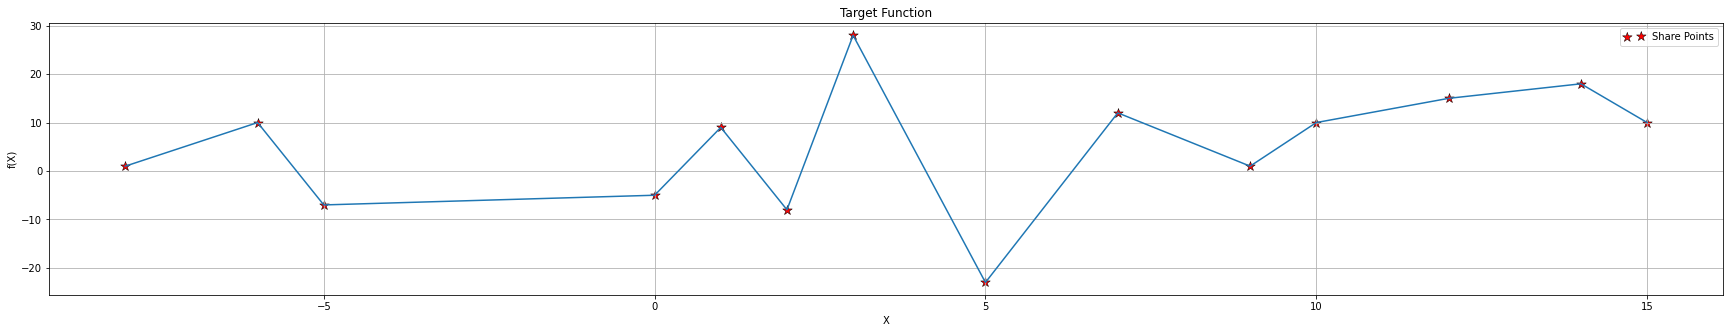

In [ ]:
'''Generate the target function f'''
%matplotlib inline
def TargetFunction(x,y,markersize):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    plt.plot(x,y)
    p1=plt.scatter(x,y,marker = '*',s=markersize,edgecolors = 'black', linewidth=.5,c = 'red')
    plt.legend([p1],['Share Points'],scatterpoints=2,loc ="upper right")
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title('Target Function')
    plt.rcParams.update({'font.size': 18})
    plt.grid()
    return plt


f = TargetFunction(x,y,markersize = 100)

### <span style="color:blue">[1.2)](#toa)(10 pts) Compute "the best" approximant function $g$ using Wavelet basis functions with adequate parameters to approximate $f$ with a relative $L_2$ norm below 30% error; use a continuous approximation equivalent to an infinite number of collocation points ($m\rightarrow\infty$). Report the number of packets, modes, and other parameters used, show a comparison plot, compute the $L_2$ norm relative error. Explain why the end points of the approximation do not match the given data.
</span><a id="a12"></a>

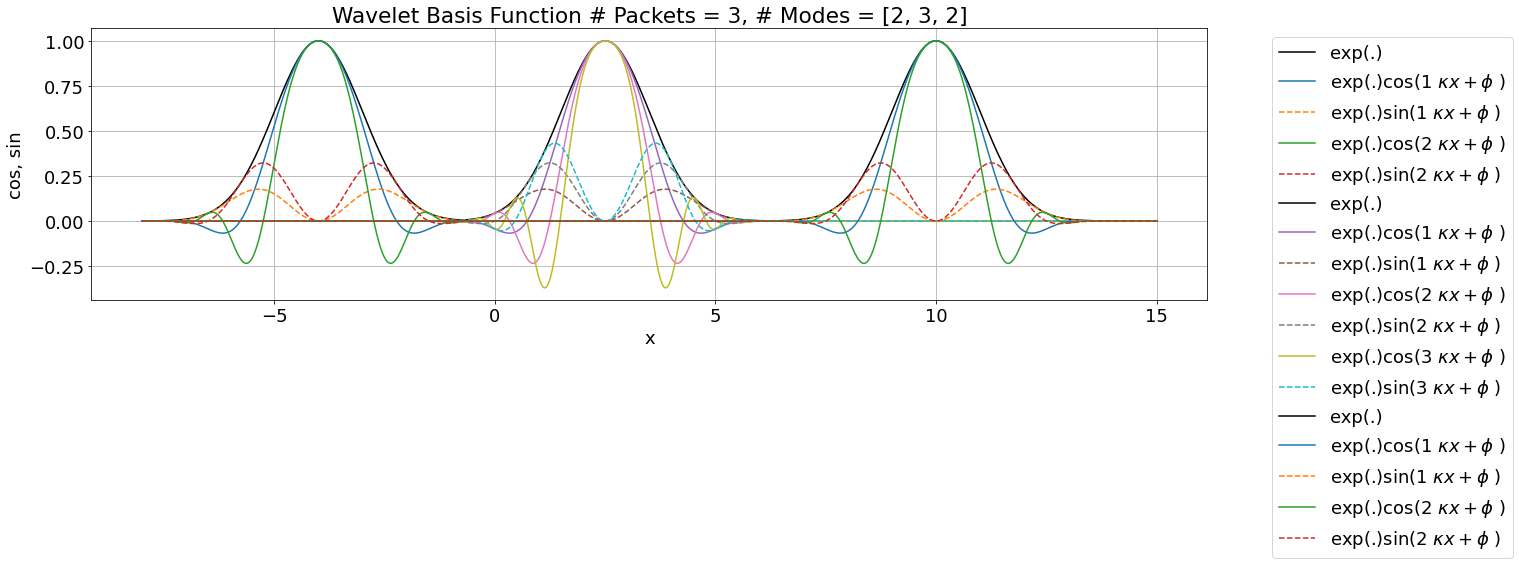

In [24]:
'''Build the basis functions'''

def WaveletBasis(x_new, kappa, bunch_pts, N, sigma, phase_shift, points_n):
    A = np.zeros((points_n,int(sum(N)* 2 + len(N))))

    j=0
    for i, modes in enumerate(N):
        sig = sigma[i]
        p = bunch_pts[i]
        first_col = int(sum(N[:i]))*2+i
        A[:,first_col] = np.exp(-((x_new-p)**2)/(2*(sig**2)))
        #print(np.exp(-((x_new-p)**2)/(2*(sig**2))))
        for mode_num in range(modes):
            column = first_col + (mode_num*2) + 1
            j = mode_num + 1
            #points = (())
            A[:,column] = np.exp(-((x_new-p)**2)/(2*(sig**2)))*(np.cos(((j*(x_new-p)**2))/2))
            A[:,column+1] = np.exp(-((x_new-p)**2)/(2*(sig**2)))*((np.sin(((j*phase_shift*(x_new-p)**2))/2)))
    return np.array(A)

#x_new*kappa*j
#------------------------------------------------------------------------------------------------------------------------#
#Data
m = 1000
#N = [2]
N = [2, 3, 2]
#bunch_pts = [5]
bunch_pts = [-4, 2.5, 10]
#sigma = [2]
sigma = [1, 1, 1]
phase_shift = .5
P = len(N)



x_min = shape_pts[:,0][0]
x_max = shape_pts[:,0][-1]
wavelength = x_max - x_min
x_new = np.linspace(x_min,x_max,m)

Kappa = (2*math.pi)/wavelength
#------------------------------------------------------------------------------------------------------------------------#
A = WaveletBasis(x_new, Kappa, bunch_pts, N, sigma, phase_shift, m)

#------------------------------------------------------------------------------------------------------------------------#
#Function for ploting the graph

def plotWavelet(N,bunch_pts,phase_shift,sigma,kappa,x_min,x_max,x,y,m):

    #num_plotting_pts = 1000
    x_new = np.linspace(x_min, x_max, m)
    A = WaveletBasis(x_new, kappa, bunch_pts, N, sigma, phase_shift,m)

    fig = plt.figure(figsize=(20, 5))
    ax = plt.subplot(111)

    plt.grid()
    plt.title(f"Wavelet Basis Function # Packets = {len(N)}, # Modes = {N}")
    plt.xlabel('x'); plt.ylabel('cos, sin')
    for i, modes in enumerate(N):
        first_col = int(sum(N[:i])) * 2 + i
        plt.plot(x_new, A[:, first_col], "k-", label="exp(.)")
        for modeNum in range(modes):
            # Iterates through an individual packet
            column = first_col + (modeNum) * 2 + 1

            k = modeNum + 1

            plt.plot(x_new, A[:, column],'-' ,label=r"exp(.)cos(%i $\kappa x + \phi$ )" % k)
            plt.plot(x_new, A[:, column + 1],'--' ,label=r"exp(.)sin(%i $\kappa x + \phi$ )" % k)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return plt.show()

plotWavelet(N, bunch_pts, phase_shift, sigma, Kappa, x_min, x_max, x, y, m)


In [5]:
'''Plot comparison of f and g_best_vec'''




'Plot comparison of f and g_best_vec'

In [6]:
'''L2 norm error'''


'L2 norm error'

<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[1.3)](#toa)(15 pts) Constrain the end points of the approximation in 1.2) and compute the relative error. Show in a plot a comparison of the constrained and unconstrained results. Explain the method to constrain the end points and whether the method was effective in this case.
</span><a id="a13"></a>

In [7]:
'''Plot comparison of f and g_best_vec with constrained end points'''


'Plot comparison of f and g_best_vec with constrained end points'

In [8]:
'''L2 norm error'''


'L2 norm error'

In [9]:
'''Code for comparison of methods'''


'Code for comparison of methods'

<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 2 (65 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa)(35 pts) Approximate the piecewise linear function of 1.1) using Fourier Basis functions using 8 modes so that both the end points and the derivative at the end points are constrained by the corresponding values of the target function. Compute the relative error. Explain the method you developed and your results.</span><a id="a21"></a>

In [10]:
'''Build the basis functions list'''


'Build the basis functions list'

In [11]:
'''Plot comparison of f and g_best_vec with constrained values and derivative at end points'''


'Plot comparison of f and g_best_vec with constrained values and derivative at end points'

In [12]:
'''L2 norm error'''


'L2 norm error'

<span style="color:blue">**Explanation:**</span>

### <span style="color:blue">[2.2)](#toa)(30 pts) Show numerically why the derivative at the end points cannot match the target function derivatives. Explain.</span><a id="a22"></a>

<span style="color:blue">**Explanation:**</span>

## <span style="color:blue">[Assignment 3 (5 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>

<span style="color:blue">**Answer:**</span>